# 개별 변수 분석하기 (단변량 분석) ; 숫자형 데이터 시각화

## 히스토그램
### : 숫자형 변수의 분포를 살펴보기 위한 가장 기본이 되는 그래프

**기본 형태**

**plt.hist(1차원 데이터, bins=구간 개수, edgecolor='grey')**

 - x축 : 데이터 값의 의미
 - y축 : 구간별 데이터 개수
 
**주의할 점**
 : bins 적절히 조절
 
 **단점**
  - 구간 bin의 너비를 어떻게 잡는지에 따라 전혀 다른 모양이 될 수 있음.


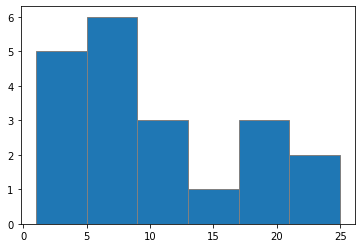

In [4]:
import matplotlib.pyplot as plt

a = [1,2,2,4,4,5,5,5,7,8,8,10,12,12,15,18,18,18,24, 25]
plt.hist(a, bins=6, edgecolor='grey')
plt.show()

**해석**

5-10 사이가 가장 많고, 13-17 사이가 가장 적다.

=> 9 이하가 주를 이룬다.

**결과를 저장하면 구간과 빈도수 확인 가능**
 - 히스토그램을 저장하면 튜플
 - 튜플 안에는 numpy array가 2개 구성됨.
 - 첫 번째 넘파이 어레이 : 빈도수
 - 두 번째 넘파이 어레이 : 구간값

(array([5., 6., 3., 1., 3., 2.]), array([ 1.,  5.,  9., 13., 17., 21., 25.]), <BarContainer object of 6 artists>)
<class 'tuple'>
--------------------------------------------------
빈도수:  [5. 6. 3. 1. 3. 2.]
구간값:  [ 1.  5.  9. 13. 17. 21. 25.]


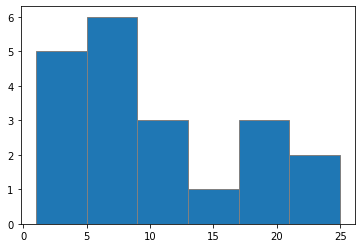

In [7]:
hist = plt.hist(a, bins=6, edgecolor='grey')

print(hist)
print(type(hist))
print('-'*50)
print('빈도수: ', hist[0])
print('구간값: ', hist[1])

## 밀도함수 그래프
 - 막대의 너비를 가정하지 않고 모든 점에서 데이터의 밀도를 추정하는 커널 밀도 추정 방식을 사용하여 이러한 단점을 해결
 - 밀도함수그래프 면적 = 1
 
 Series 혹은 DataFrame의 메서드
 .plot(kind='kde') 형태로 실행
 
 **밀도 추정** : 측정(관측)된 데이터로부터 전체 데이터 분포의 특성을 추정

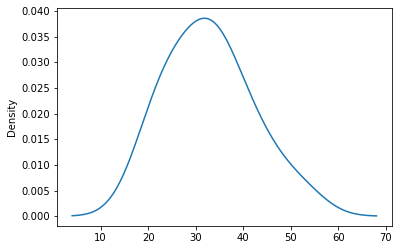

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

age = [20, 21, 38, 26, 43 ,23, 52, 31, 36, 44, 29, 27, 33, 34, 35]

age = pd.Series(age)
age.plot(kind='kde')
plt.show()

## Boxplot
### : 숫자들의 분포를 간단히 살펴볼 수 있게 해주는 그래프

**기본형태**
plt.boxplot(데이터, vert=)
 - vert : vartical의 약자로, 생략하면 박스플롯 세로로 그림. vert=False로 지정 시 가로로 그림.
 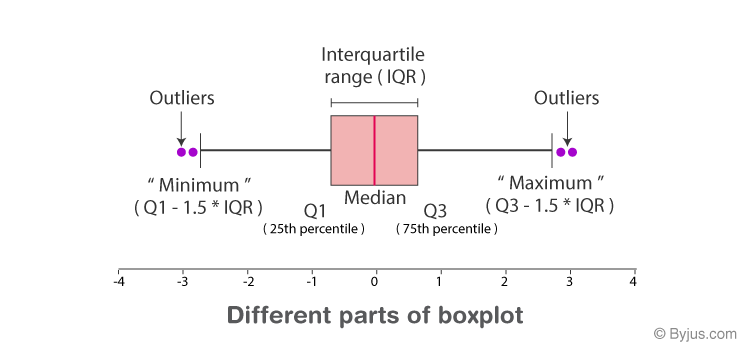

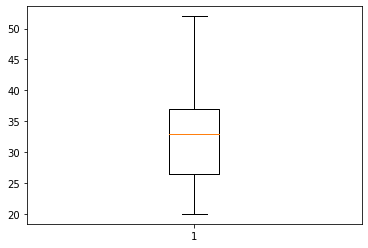

In [11]:
import matplotlib.pyplot as plt

age = [20, 21, 38, 26, 43 ,23, 52, 31, 36, 44, 29, 27, 33, 34, 35]
plt.boxplot(age)
plt.show()

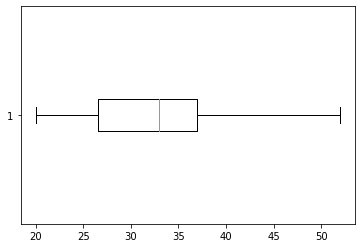

In [12]:
import matplotlib.pyplot as plt

age = [20, 21, 38, 26, 43 ,23, 52, 31, 36, 44, 29, 27, 33, 34, 35]
plt.boxplot(age, vert=False)
plt.show()

박스 플롯을 저장하면 값들을 얻어낼 수 있음.
 - 박스플롯을 저장하면 딕셔너리로 나옴.
 - 각 key에 해당하는 정보를 얻기 위해서는 .get_ydata() 메서드 이용 (boxplot을 옆으로 그렸다면 .get_xdata())

<class 'dict'>
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
--------------------------------------------------
[<matplotlib.lines.Line2D object at 0x000001E4AB06B5B0>, <matplotlib.lines.Line2D object at 0x000001E4AB06B8B0>]
[26.5 20. ]
[37. 52.]


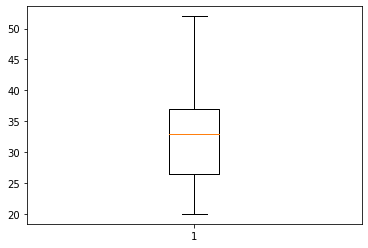

In [13]:
age = [20, 21, 38, 26, 43 ,23, 52, 31, 36, 44, 29, 27, 33, 34, 35]
box = plt.boxplot(age)

print(type(box))
print(box.keys())
print('-'*50)
print(box['whiskers'])
print(box['whiskers'][0].get_ydata()) # 아래쪽 수염의 max, min
print(box['whiskers'][1].get_ydata()) # 위쪽 수염의 min, max

## Violin plot
### : 데이터의 분포와 범위를 한눈에 보기 쉽게 나타내는 그래프
박스 플롯과 비슷하지만 분포 함께 확인할 수 있음.
 - vert=False : 가로로 그리기
 - showmeans=True : 평균선 그리기
 - plt.text() : 그래프에 텍스트 추가 (평균값 직접 입력 등)

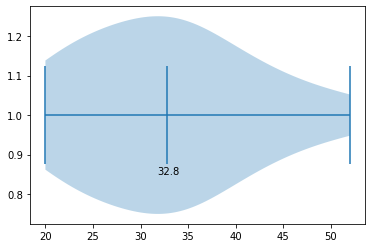

In [16]:
import matplotlib.pyplot as plt
import numpy as np

age = [20, 21, 38, 26, 43 ,23, 52, 31, 36, 44, 29, 27, 33, 34, 35]
age_mean = np.mean(age)

plt.violinplot(age, vert=False, showmeans=True)
plt.text(age_mean-1, 0.85, age_mean)
plt.show()

## 숫자형 변수에 대한 그래프 한꺼번에 그리고 비교하기
### 각 그래프 특징
 - Histogram : bin 개수를 조절하며, 숲과 나무를 살펴볼 수 있음.
 - Densityplot : 연속된 분포를 볼 수 있음.
 - Boxplot : 분포를 단순화 하여 손쉽게 볼 수 있음. 이상치(Outlier)에 대한 기준 제시
 - Violinplot : Boxplot 과 Densityplot의 중간정도


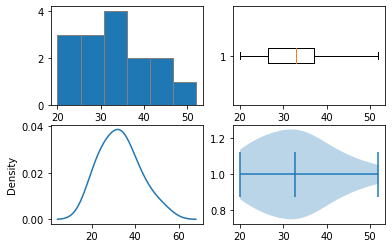

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

age = [20, 21, 38, 26, 43 ,23, 52, 31, 36, 44, 29, 27, 33, 34, 35]

plt.subplot(2,2,1)
plt.hist(age, bins=6, edgecolor='grey')

plt.subplot(2,2,2)
plt.boxplot(age, vert=False)

plt.subplot(2,2,3)
pd.Series(age).plot(kind='kde')

plt.subplot(2,2,4)
plt.violinplot(age, vert=False, showmeans=True)

plt.show()

In [ ]:
# 분석을 위해서 보통 데이터 프레임으로부터 숫자형 변수의 분포를 아래 그래프들을 이용하여 살펴봄.

## 라인차트
 - 시간의 흐름에 따른 y값의 추세를 확인하기 위함.
 - 데이터프레임으로부터 x축, y축 변수 지정
 - x축 데이터가 날짜 형식

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

air = pd.read_csv('https://')